In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
from scipy.optimize import curve_fit

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic

import warnings
warnings.filterwarnings("ignore")

In [3]:
#LOADING DATA SET

df = pd.read_csv("Data/CTA_data.csv")
ts = df[['service_date','total_rides']]
ts['date'] = pd.to_datetime(ts['service_date'])
ts.drop(columns = ['service_date'], axis = 1, inplace = True)
ts.set_index('date', inplace = True)

In [4]:
ts_M = ts.resample('M').sum()

In [4]:
model = ARMA(ts_M, order=(8,6))
results = model.fit(trend='nc', method='mle')

In [5]:
#f-test
def f_test(a,b,c):
    f_stat = (a-b/4)/(b/210-(4*c+4))
    pvalue = f.cdf(f_stat,4,210-(4*c+4))
    
    return 1-pvalue
    

#MSE function
def mse(res):
    error = 0
    for r in res:
        error += r**2
    return error

err = [0]

model = ARMA(ts_M, order=(2,1))
results = model.fit(trend='nc', method='mle')
err = [mse(results.resid)]

#test function
for n in range(2,3):
    print('Testing ARMA ({0},{1})'.format(2*n, (2*n-1)))
    model = ARMA(ts_M, order=(2*n,2*n-1))
    results = model.fit(trend='nc', method='mle')
    err.append(mse(results.resid))
    if(n>1):
        value = f_test(err[n-2],err[n-1],n)
        if(value > 0.05):
            break
            
print("Best model is ARMA(%s,%s)"%(2*(n-1),2*(n-1)-1))
    

Testing ARMA (4,3)
Best model is ARMA(2,1)


In [44]:
def exp_function(t, R1, r1, c):
    return(R1 * np.exp(-r1 * t) + c)

def cyclic_exp_function(t, B1, b1, C1, w):
    return(B1*np.exp(b1*t)*(C1*np.sin(w*t)+np.sqrt(1-C1**2)*np.cos(w*t)))

def quadratic_function(x, a, b, c):
    return a * x ** 2 + b * x + c 

In [6]:
y = np.array(ts_M['total_rides'])
# y = y - np.mean(y)
# y = y/max(y)
x = np.arange(0, len(ts_M))

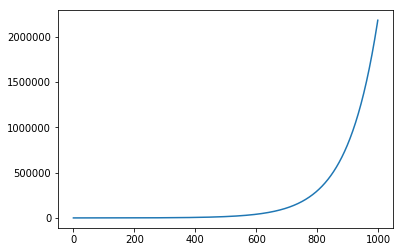

In [14]:
plt.plot(exp_function(x,100,1))

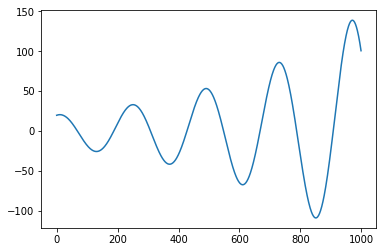

In [9]:
x = np.arange(0,10,.01)
plt.plot(cyclic_exp_function(x,20,.2,.2,5*np.pi/6))

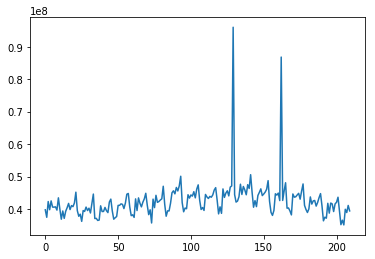

In [7]:
plt.plot(x,y)

In [55]:
popt, pcov = curve_fit(cyclic_exp_function, x, y, method=)

In [57]:
popt

array([ nan,  nan,  nan,  nan])

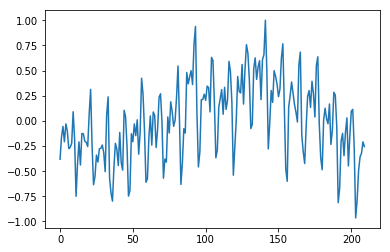

In [56]:
x = np.arange(0,len(ts_M))
plt.plot(x, y)
plt.plot(x,cyclic_exp_function(x, *popt))